  # <center>Google Data Analytics Capstone: Cyclistic Bike Share Speedy Success
    


Analysis by : Nithin Ramayanam

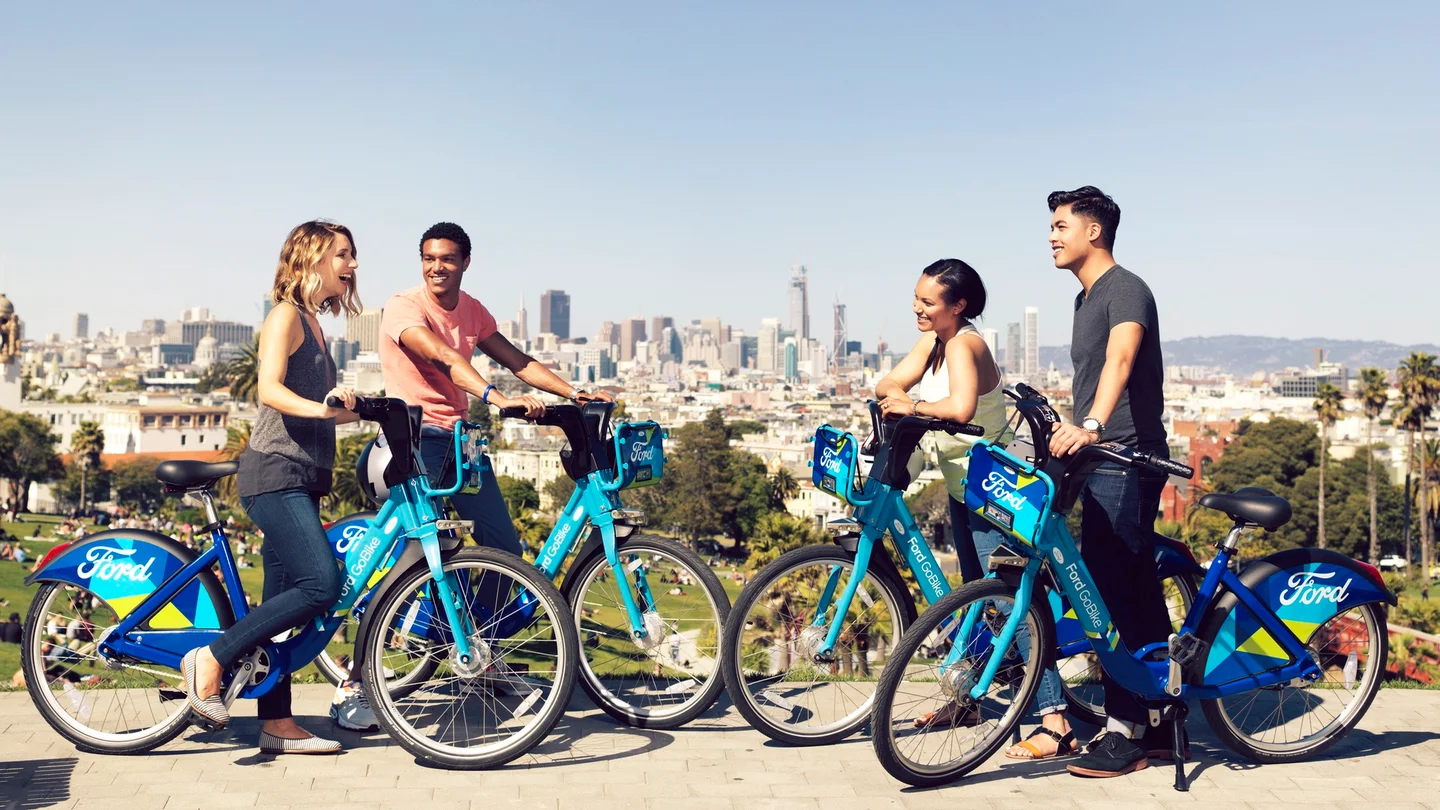

# **Introduction**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo-tracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. The bicycle hire company has two categories of customers — casual riders — they utilize Cyclistic’s bikes on a one-off or short-term basis, and members — are subscribed to the annual riders’ plan.

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From the insights, our team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

There are 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as Casual riders. Customers who purchase annual memberships are Cyclistic members.

In order to answer the key business questions, I followed the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

# Ask
Three questions to consider:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?



# Prepare

* The data used is ***[Cyclistic’s Historical Trip Data](https://divvy-tripdata.s3.amazonaws.com/index.html)*** to analyze and identify trends

* The previous 12 months data for the ** year 2022** is used for analysis.

* The data is stored in CSV files. Each file contains one month data. Thus a total of 12 .csv files.

* The data contains 13 columns, which are categorical data, numerical data, date and time, and locations.

* The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate. 

* The data has been made available by Motivate International Inc. under this ***[license](https://www.divvybikes.com/data-license-agreement)***. 



In [1]:
#import pyhton libraries 
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
trip1 = pd.read_csv("Cyclistic Datasets/2022/202201-divvy-tripdata.csv")
trip2 = pd.read_csv("Cyclistic Datasets/2022/202202-divvy-tripdata.csv")
trip3 = pd.read_csv("Cyclistic Datasets/2022/202203-divvy-tripdata.csv")
trip4 = pd.read_csv("Cyclistic Datasets/2022/202204-divvy-tripdata.csv")
trip5 = pd.read_csv("Cyclistic Datasets/2022/202205-divvy-tripdata.csv")
trip6 = pd.read_csv("Cyclistic Datasets/2022/202206-divvy-tripdata.csv")
trip7 = pd.read_csv("Cyclistic Datasets/2022/202207-divvy-tripdata.csv")
trip8 = pd.read_csv("Cyclistic Datasets/2022/202208-divvy-tripdata.csv")
trip9 = pd.read_csv("Cyclistic Datasets/2022/202209-divvy-publictripdata.csv")
trip10 = pd.read_csv("Cyclistic Datasets/2022/202210-divvy-tripdata.csv")
trip11= pd.read_csv("Cyclistic Datasets/2022/202211-divvy-tripdata.csv")
trip12 = pd.read_csv("Cyclistic Datasets/2022/202212-divvy-tripdata.csv")

In [4]:
#drop NA values (Only rows that contain all NA)
trip1 = trip1.dropna(how='all',axis=0)
trip2 = trip2.dropna(how='all',axis=0)
trip3 = trip3.dropna(how='all',axis=0)
trip4 = trip4.dropna(how='all',axis=0)
trip5 = trip5.dropna(how='all',axis=0)
trip6 = trip6.dropna(how='all',axis=0)
trip7 = trip7.dropna(how='all',axis=0)
trip8 = trip8.dropna(how='all',axis=0)
trip9 = trip9.dropna(how='all',axis=0)
trip10 = trip10.dropna(how='all',axis=0)
trip11 = trip11.dropna(how='all',axis=0)
trip12 = trip12.dropna(how='all',axis=0)

In [6]:
#Combine data set
complete_df = pd.concat([trip1,trip2,trip3,trip4,trip5,trip6,trip7,trip8,trip9,trip10,trip11,trip12], ignore_index=True)
complete_df.drop(['ride_id'], axis =1)
complete_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667712,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
5667713,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
5667714,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
5667715,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [7]:
complete_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


# Process

First, I uploaded the 12 different CSV files into python notebooks and merged all 12 files into one big data frame. I moved on to clean the data — removed all empty rows and ‘NA’ values.A new column, “ride_length”, was added to calculate the length of each ride by subtracting the column “started_at” from the column “ended_at”.A new column "day_of_week" was addeed to calcualte the  the day of the week that each ride noting that 1 = Sunday and 7 = Saturday. Removed all rows with neagtive values ride_length column assuming Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.This is one of the methods that aid the process of understanding the data and ascertaining the integrity of the data set.



In [8]:
#adding new columns ride_length and weekdays
complete_df['ended_at']= pd.to_datetime(complete_df['ended_at'])
complete_df['started_at'] =pd.to_datetime(complete_df['started_at'])
complete_df['ride_length'] = (complete_df['ended_at'] - complete_df['started_at'])/pd.Timedelta(minutes=1)
complete_df['ride_length'] = complete_df['ride_length'].astype('int32')

complete_df['weekdays'] = complete_df['started_at'].dt.dayofweek + 1

In [9]:
# Sorting values by "ride_length" column in ascending order.
complete_df.sort_values(by = 'ride_length')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,weekdays
4305947,E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,Cornell Dr & Hayes Dr,653,NaN,NaN,41.780576,-87.585171,41.780000,-87.590000,member,-10353,3
4743742,918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,Wilton Ave & Diversey Pkwy*,chargingstx0,Wilton Ave & Diversey Pkwy*,chargingstx0,41.932418,-87.652705,41.932418,-87.652705,member,-168,4
2095200,38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,NaN,NaN,NaN,NaN,41.930000,-87.790000,41.930000,-87.790000,casual,-137,2
1635637,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,NaN,NaN,Kostner Ave & North Ave,519,41.900000,-87.740000,41.910000,-87.740000,casual,-130,2
1810805,BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.917831,-87.653363,41.920000,-87.650000,member,-129,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905537,70835A30C542BA2E,docked_bike,2022-07-09 01:02:46,2022-08-01 19:11:35,Ashland Ave & 74th St,20245,NaN,NaN,41.759236,-87.663474,NaN,NaN,casual,34208,6
286843,23697816035F9A8F,docked_bike,2022-03-05 19:08:58,2022-03-29 15:43:02,Sheffield Ave & Fullerton Ave,TA1306000016,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.925602,-87.653708,41.889955,-87.680651,casual,34354,6
2119596,94DD1FB2367EA8B6,docked_bike,2022-06-15 07:56:59,2022-07-10 04:57:37,Michigan Ave & 14th St,TA1307000124,NaN,NaN,41.864059,-87.623727,NaN,NaN,casual,35820,3
1464697,DCFE0DB8022DFABC,docked_bike,2022-05-08 00:28:53,2022-06-02 04:46:41,Sheffield Ave & Fullerton Ave,TA1306000016,NaN,NaN,41.925602,-87.653708,NaN,NaN,casual,36257,7


In [10]:
# Such errors happened because the "ending time" is earlier than the "starting time" in their respective rows.
complete_df[complete_df['ride_length'] < 1].count()


ride_id               121089
rideable_type         121089
started_at            121089
ended_at              121089
start_station_name     90129
start_station_id       90129
end_station_name       78809
end_station_id         78809
start_lat             121089
start_lng             121089
end_lat               121087
end_lng               121087
member_casual         121089
ride_length           121089
weekdays              121089
dtype: int64

In [11]:
# Removing 121089 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.

complete_df = complete_df[complete_df['ride_length'] >= 1]
complete_df = complete_df.reset_index()
complete_df = complete_df.drop(columns=['index'])
complete_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,weekdays
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2,4
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,4,1
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,4,2
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,14,2
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546623,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,3,1
5546624,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,12,3
5546625,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,4,4
5546626,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,3,3


### Exploring the Data

In [13]:
#Exploring the data befor emoving to analyze phase
print(f'the size of total data set:{complete_df.shape}')
complete_df.info()

the size of total data set:(5546628, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546628 entries, 0 to 5546627
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         int32         
 14  weekdays            int64         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(1), object(7)
memory usage: 613.6+ MB


In [15]:
print(f"minimum ride length for any of the riders: {complete_df['ride_length'].min()} minutes")
print(f"maxium ride length for any of the riders: {complete_df['ride_length'].max()} minutes")
print(f"average ride length for any of the riders: {complete_df['ride_length'].mean()} minutes")


minimum ride length for any of the riders: 1 minutes
maxium ride length for any of the riders: 41387 minutes
average ride length for any of the riders: 19.37026478069198 minutes


The minimum ride length for any of the riders was 1 minute while the maximum ride duration was 41,387 minutes. The average ride duration stood at 19.37 minutes.



# Analyze & Share 




**Distribution of casual and member riders throughout the year (2022)**
 
The displayed pie chart below shows the proportion of casual riders and members riders in the year 2022.

<ipython-input-19-774f28f8960d>:12: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



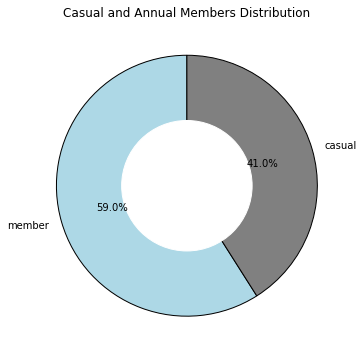

In [19]:
# Count the values in the 'TYPE' column
type_counts = complete_df['member_casual'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))  
# Adjust the figure size as per your requirement
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'grey'], 
        startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1})


# Adding borders
plt.gca().add_artist(plt.Circle((0, 0), 0.5, color='white', edgecolor='black', linewidth=1))

# Adding labels
plt.title('Casual and Annual Members Distribution')

# Displaying the plot
plt.show()

**Number of rides for each month of the year by members vs casual users**

In [23]:
# Extract month from started_at data
## 1. Convert object data (started_at) to datetime dataset
complete_df['started_at'] = pd.to_datetime(complete_df['started_at'])
complete_df['month'] = complete_df['started_at'].dt.month

In [24]:
complete_df[complete_df['member_casual'] == 'member']['month'].value_counts().sort_index()

1      83765
2      92070
3     190601
4     239853
5     347319
6     391891
7     408026
8     417206
9     395425
10    341370
11    231675
12    133285
Name: month, dtype: int64

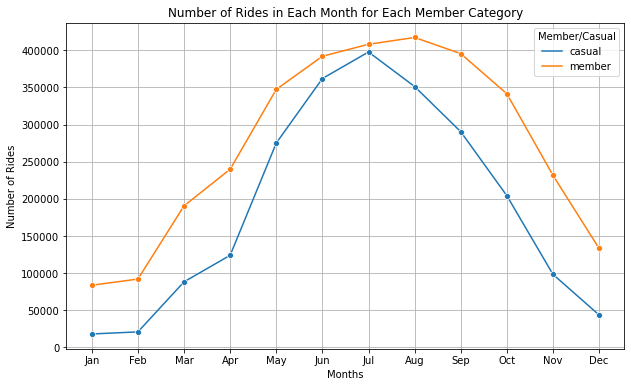

In [26]:
# Grouping the data by 'month' and 'member_casual' and counting the number of rides
rides_per_month = complete_df.groupby(['month', 'member_casual']).size().reset_index(name='ride_count')

# Filtering out rows where ride count is 0
rides_per_month = rides_per_month[rides_per_month['ride_count'] != 0]

# Plotting the line chart using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=rides_per_month, x='month', y='ride_count', hue='member_casual', marker='o')

# Adding labels and title
plt.title('Number of Rides in Each Month for Each Member Category')
plt.xlabel('Months')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Showing the plot
plt.legend(title='Member/Casual')
plt.grid(True)
plt.show()


There was a correlation between seasons of the year and riders’ behavior. The trend displayed in the line chart below shows how casual riders and members use Cyclistic’s services on monthly basis. The peck season spans May through October, as it is a summer season in the USA, so people tend to enjoy riding outside.
So the average number of rides rose exponentially during the summer months and fell drastically as the summer winds down.

The low season is definitely during the winter time (November–February), and both types of riders had very low numbers of rides. The number of rides for the annual membership began to rise in March and reached its maximum in July, August, and September. Then It fell rapidly after September.

Similar to this, the number of casual riders grew from March until it peaked in July. Then it started to decline through the rest of the years.

**Total Number of Rides in a Year by each category** 

In [27]:

complete_df.groupby('member_casual')['ride_id'].count()

member_casual
casual    2274142
member    3272486
Name: ride_id, dtype: int64

In [28]:
fig_1 = complete_df.groupby('member_casual', as_index=False).count()

px.bar(fig_1, y = 'member_casual', x = 'ride_id', range_x = [0,3000000],
        color = 'member_casual', 
        height = 300,
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#CD853F', 'member': '#058ED9'})

**The number of rides each week day by casual vs member rides.**

In [29]:
result = complete_df.groupby(['weekdays', 'member_casual'])['ride_id'].count().reset_index(name = 'ride_count')
# print(result)
result

,weekdays,member_casual,ride_count
0,1,casual,272051
1,1,member,463268
2,2,casual,258282
3,2,member,507792
4,3,casual,268784
5,3,member,512627
6,4,casual,303014
7,4,member,520791
8,5,casual,327770
9,5,member,456920


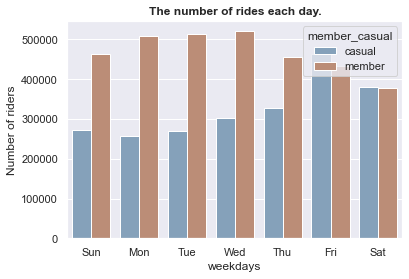

In [32]:

label_weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri","Sat"]
weekdays = [1, 2, 3, 4, 5, 6,7]
complete_df['weekdays_str'] = complete_df['weekdays'].replace(weekdays,label_weekdays)
palette = 'twilight_shifted'
sns.set()

#Plot the graph
ax = sns.countplot(
    data=complete_df, 
    x="weekdays_str", 
    hue="member_casual", 
    order = label_weekdays,
    palette = palette
)

# a title to the chart
plt.title('The number of rides each day.',fontweight="bold")
plt.ylabel('Number of riders')
plt.xlabel('weekdays')
plt.show()

On each day, casual riders utilize Cyclistic’s bikes more during the weekend and less during weekdays. From the colon chart below, you could see that Saturdays and Sundays are great riding days for casual riders.The member riders obviously ride a lot more throughout the workweek.

**The number of rides of each day by hour (Heat map)**

In [33]:
complete_df['hour'] = complete_df['started_at'].dt.hour
member_hrly = complete_df[complete_df['member_casual'] == 'member'].groupby(['hour', 'weekdays']).size().reset_index(name = 'ride_count')
member_hrly


,hour,weekdays,ride_count
0,0,1,3037
1,0,2,2646
2,0,3,2970
3,0,4,3454
4,0,5,4639
...,...,...,...
163,23,3,7063
164,23,4,8794
165,23,5,10873
166,23,6,12150


In [60]:
casual_hrly = complete_df[complete_df['member_casual'] == 'casual'].groupby(['hour', 'weekdays']).size().reset_index(name = 'ride_count')
casual_hrly

,hour,weekdays,ride_count
0,0,1,4185
1,0,2,2959
2,0,3,3009
3,0,4,3747
4,0,5,5440
...,...,...,...
163,23,3,6522
164,23,4,8540
165,23,5,13514
166,23,6,17184


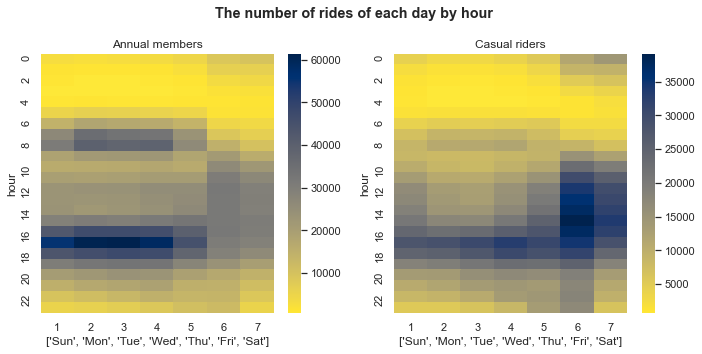

In [61]:



#Pivot table for the member data
map1 = pd.pivot_table(
    complete_df,
    values="member_casual", 
    index='hour', 
    columns=['weekdays'],
    aggfunc=(lambda x : sum(x=="member"))
)

#Pivot table for the casual data
map2 = pd.pivot_table(
    complete_df,
    values="member_casual", 
    index='hour', 
    columns=['weekdays'],
    aggfunc=(lambda x : sum(x=="casual"))
)

# Plot the heatmaps
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
fig.suptitle("The number of rides of each day by hour", fontweight="bold")
#Annuak members
sns.heatmap(map1, ax=ax[0], cmap="cividis_r", xticklabels = label_weekdays )
ax[0].set_title("Annual members")
ax[0].set_xlabel(label_weekdays)

#Casual members

sns.heatmap(map2, ax=ax[1], cmap="cividis_r")

ax[1].set_title("Casual riders")
ax[1].set_xlabel(label_weekdays)

plt.tight_layout()
plt.show()

The heatmaps reveal distinct usage patterns between the two customer segments. Annual members exhibit a clear trend of high bike utilization during weekday rush hours, particularly from 4:00 PM to 6:00 PM (returning home) and in the morning between 7:00 AM and 8:00 AM (commuting to work). Weekends also witness considerable usage, although slightly less compared to casual riders.

Conversely, casual riders showcase a different pattern, with their peak usage occurring between 10:00 a.m. and 7:00 p.m. on weekends, indicating potential leisure or travel-related bike usage. Additionally, they also utilize the bikes during the weekdays from 5:00 p.m. to 6:00 p.m. This suggests a preference for daytime exploration or short rides for leisure purposes on weekends, while still maintaining some activity during weekday evenings.

**Average duration of each type of rider**

In [36]:
complete_df['ride_length'] = pd.to_timedelta(complete_df['ride_length'])
average_duration = complete_df['ride_length'].mean()

In [37]:
average_duration

Timedelta('0 days 00:00:00.000000019')

In [38]:
average_duration_member = complete_df[complete_df['member_casual'] == 'member']['ride_length'].mean()
average_duration_casual = complete_df[complete_df['member_casual'] == 'casual']['ride_length'].mean()

In [39]:
average_duration_member

Timedelta('0 days 00:00:00.000000012')

In [40]:
average_duration_casual

Timedelta('0 days 00:00:00.000000029')

In [41]:
print(f'the average of riding time is for all type of riders: {average_duration}')
print(f'the average riding time of member riders is: {average_duration_member}')
print(f'the average riding time of casual riders is: {average_duration_casual}')

the average of riding time is for all type of riders: 0 days 00:00:00.000000019
the average riding time of member riders is: 0 days 00:00:00.000000012
the average riding time of casual riders is: 0 days 00:00:00.000000029


**The type of bicycles used**

In [42]:
type_bike_df =complete_df.groupby(['rideable_type', 'member_casual']).size().reset_index(name='count')
type_bike_df

,rideable_type,member_casual,count
0,classic_bike,casual,878682
1,classic_bike,member,1684008
2,docked_bike,casual,175958
3,electric_bike,casual,1219502
4,electric_bike,member,1588478


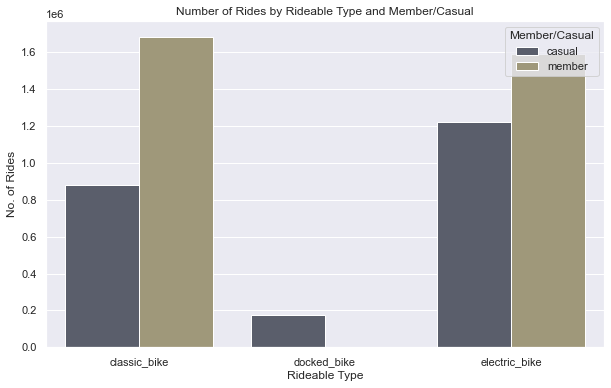

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=type_bike_df, x='rideable_type', y='count', hue='member_casual', 
            palette='cividis')
plt.xlabel('Rideable Type')
plt.ylabel('No. of Rides')
plt.title('Number of Rides by Rideable Type and Member/Casual')
plt.legend(title='Member/Casual')

plt.show()



Cyclistic has three different types of bikes, depending on users’ preferences. Data shows that the annual members rode the classic bikes a little bit higher than the electric bikes, Classic bikes stand at 1.6 million and electric bike stand at 1.5 million for member riders. where as Electric bikes are the preferred choice for casual riders—about 1.2 million. Over 800,000 casual riders chose to ride a classic bike.




**The top 10 popular start and destination stations for riders**

In [53]:
# Create a new DataFrame for all stations
stations_df = pd.concat([
    pd.DataFrame({"stations": complete_df['start_station_name'], "member_casual": complete_df['member_casual']}),
    pd.DataFrame({"stations": complete_df['end_station_name'], "member_casual": complete_df['member_casual']})
])

# Exclude entries with no station name
stations_df_new = stations_df[~(stations_df['stations'].isin(["", None]))]

# Separate the DataFrame by rider type
stations_member = stations_df_new[stations_df_new['member_casual'] == 'member']
stations_casual = stations_df_new[stations_df_new['member_casual'] == 'casual']

# Get the top 10 popular stations for all, members, and casual riders
top_10_station = stations_df_new.groupby('stations').size().reset_index(name='station_count') \
                                 .sort_values(by='station_count', ascending=False) \
                                 .head(10)


In [54]:
top_10_station

,stations,station_count
1544,Streeter Dr & Grand Ave,147793
356,DuSable Lake Shore Dr & North Blvd,80732
355,DuSable Lake Shore Dr & Monroe St,79981
794,Michigan Ave & Oak St,78463
1616,Wells St & Concord Ln,73856
801,Millennium Park,69006
241,Clark St & Elm St,68425
611,Kingsbury St & Kinzie St,65074
1550,Theater on the Lake,64983
1617,Wells St & Elm St,60929


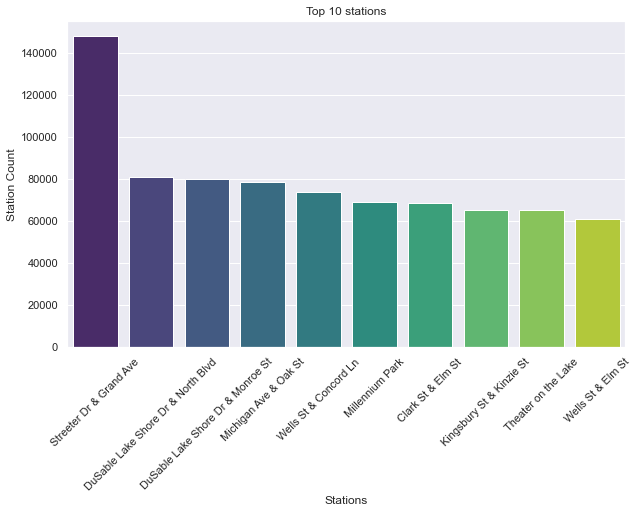

In [55]:
# Plot top 10 stations for all riders
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_station, x='stations', y='station_count', palette='viridis')
plt.title('Top 10 stations')
plt.xlabel('Stations')
plt.ylabel('Station Count')
plt.xticks(rotation=45)
plt.show()

In [56]:
# Get the top 10 popular stations for members
top_10_stations_member = stations_member.groupby('stations').size().reset_index(name='station_count') \
                                           .sort_values(by='station_count', ascending=False) \
                                           .head(10)


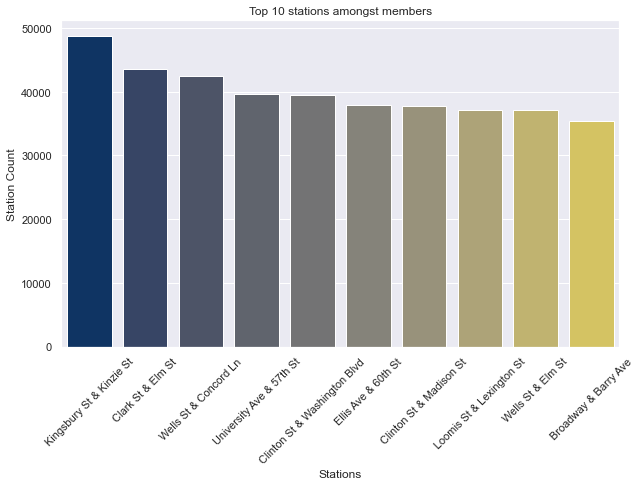

In [57]:

# Plot top 10 stations for members
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_stations_member, x='stations', y='station_count', palette='cividis')
plt.title('Top 10 stations amongst members')
plt.xlabel('Stations')
plt.ylabel('Station Count')
plt.xticks(rotation=45)
plt.show()

In [58]:
# Get the top 10 popular stations for members
top_10_stations_casual = stations_casual.groupby('stations').size().reset_index(name='station_count') \
                                           .sort_values(by='station_count', ascending=False) \
                                           .head(10)
top_10_stations_casual

,stations,station_count
1502,Streeter Dr & Grand Ave,116025
350,DuSable Lake Shore Dr & Monroe St,60442
792,Millennium Park,51378
785,Michigan Ave & Oak St,50955
351,DuSable Lake Shore Dr & North Blvd,48989
1416,Shedd Aquarium,38228
1508,Theater on the Lake,37434
1573,Wells St & Concord Ln,31310
232,Clark St & Armitage Ave,27285
354,Dusable Harbor,27054


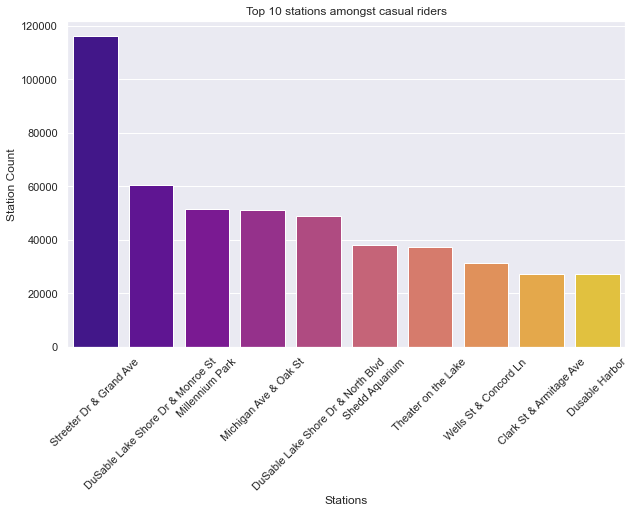

In [59]:

# Plot top 10 stations for casual riders
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_stations_casual, x='stations', y='station_count', palette='plasma')
plt.title('Top 10 stations amongst casual riders')
plt.xlabel('Stations')
plt.ylabel('Station Count')
plt.xticks(rotation=45)
plt.show()


The traffic stations of the members are mostly located in the city and office areas. Meanwhile, the most popular stations for casual riders are located in the attractions district, such as the beach and park for jolly rides, which last longer than commuting to and from work.


# Analysis

* Typically, Cyclistic experiences increased usage of its services on weekends and during the warmer summer months.

* Annual members primarily utilize the cycling service for commuting purposes, whereas casual users tend to ride for leisure and enjoyment.

* Casual riders tend to cover longer distances per trip compared to annual members.

* Docked bikes are the preferred choice among riders.

* Casual riders tend to embark on more trips along the coastline of Lake Michigan, whereas annual members opt for more inland trips.



# Act - Reommendations

* Introduce a promotional campaign targeting the summer months from May to September.
* Implement a weekend-specific pricing structure tailored to casual riders, offering flexibility.
* Introduce enticing incentives for new members focusing on those who frequently undertake long-distance rides.
* Extend discounted membership offers specifically to casual riders for the station with the highest ride volume.
* Enhance electric bikes with new technological features aimed at appealing to a broader base of casual riders.
* Create a family membership package/program to attract families who may have divergent preferences on cycling.

# Additional Considerations

Given the fact that we encountered certain gaps in our data, such as the lack of payment, age, gender, and geographical information, we are unable to make further recommendations. Having access to demographic data is crucial for developing effective marketing strategies, as it enables businesses to gain deeper insights into their target audience. Once the company has this information, they can segment their customers into separate groups based on their habits, interests, and other important characteristics. By doing so, the marketing team can create advertising campaigns that align with Cyclistic's marketing objectives and financial targets, thereby maximizing their effectiveness.